In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import csv
from pprint import pprint

plt.rcParams.update({"font.family": "Times New Roman", "mathtext.fontset": "cm"})

In [5]:
def integrate(A):
    integral = np.zeros(len(A))
    for i in range(len(A)):
        integral[i] = np.sum(A[:i])
    return integral

In [6]:
def normalize(A):
    return (A - np.min(A)) / (np.max(A) - np.min(A))

In [7]:
def read_data(file_number):
    ch1_filename = f"data/ALL{file_number}/A{file_number}CH1.csv"
    ch2_filename = f"data/ALL{file_number}/A{file_number}CH2.csv"
    img_filename = f"data/ALL{file_number}/A{file_number}DS.BMP"
    
    with open(ch1_filename) as file:
        ch1_metadata = dict([next(file).split(",")[:-1] for _ in range(15)])
    with open(ch2_filename) as file:
        ch2_metadata = dict([next(file).split(",")[:-1] for _ in range(15)])
    
    ch1_raw_data = np.array(pd.read_csv(ch1_filename, skiprows=15)["Waveform Data"])
    ch2_raw_data = np.array(pd.read_csv(ch2_filename, skiprows=15)["Waveform Data"])

    return ch1_metadata, ch2_metadata, ch1_raw_data, ch2_raw_data

In [8]:
def frequency_to_str(frequency):
    if frequency <= 100:
        return f"{frequency:.1f} Hz"
    if frequency < 1E6:
        return f"{frequency/1E3:.1f} kHz"
    if frequency >= 1E6:
        return f"{frequency/1E6:.1f} MHz"

In [20]:
def show_data(title, figure_filename, metadata, ch1_raw_data, ch2_raw_data, operate, operated_label, len_average=15):
    fig, ax = plt.subplots()
    memory_length = float(metadata["Memory Length"])
    horizontal_scale = float(metadata["Horizontal Scale"])
    sampling_period = float(metadata["Sampling Period"])
    num_datapoints = int(10*horizontal_scale/sampling_period)
    starting_index = int((memory_length - num_datapoints) / 2)

    time = np.linspace(-5*horizontal_scale, 5*horizontal_scale, num_datapoints)
    ch1_data = normalize(ch1_raw_data[starting_index:starting_index+num_datapoints])
    ch2_data = normalize(ch2_raw_data[starting_index:starting_index+num_datapoints])

    padding = np.zeros(int(len_average/2))
    padding[:] = np.nan
    kernel = np.ones(len_average) / len_average
    ch1_operated = np.array(list(padding) + list(normalize(operate(np.convolve(ch1_raw_data[starting_index:starting_index+num_datapoints], kernel, mode="valid")))) + list(padding))

    ax.plot(time, ch1_data, label="$V_{in}$", alpha=0.5)
    ax.plot(time, ch2_data, label="$V_{out}$")
    ax.plot(time, ch1_operated, label=operated_label)
    ax.grid(True, color="#aaa", ls="--")
    ax.set(title=title, xlabel="Tiempo [s]", ylabel="Voltaje normalizado [u.a.]")
    plt.legend()

    plt.savefig(f"figures/{figure_filename}", dpi=300)

In [21]:
waveforms_df = pd.read_csv("waveforms.csv")

Progress: 2.9%
Progress: 5.7%
Progress: 8.6%
Progress: 11.4%
Progress: 14.3%
Progress: 17.1%
Progress: 20.0%
Progress: 22.9%
Progress: 25.7%
Progress: 28.6%
Progress: 31.4%
Progress: 34.3%
Progress: 37.1%
Progress: 40.0%
Progress: 42.9%
Progress: 45.7%
Progress: 48.6%
Progress: 51.4%
Progress: 54.3%
Progress: 57.1%
Progress: 60.0%


C:\Users\Laevateinn\AppData\Local\Temp\ipykernel_13036\2934750263.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


Progress: 62.9%
Progress: 65.7%
Progress: 68.6%
Progress: 71.4%
Progress: 74.3%
Progress: 77.1%
Progress: 80.0%
Progress: 82.9%
Progress: 85.7%
Progress: 88.6%
Progress: 91.4%
Progress: 94.3%
Progress: 97.1%
Progress: 100.0%


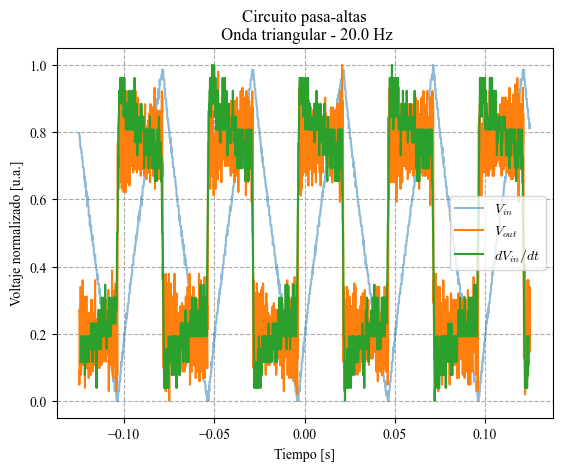

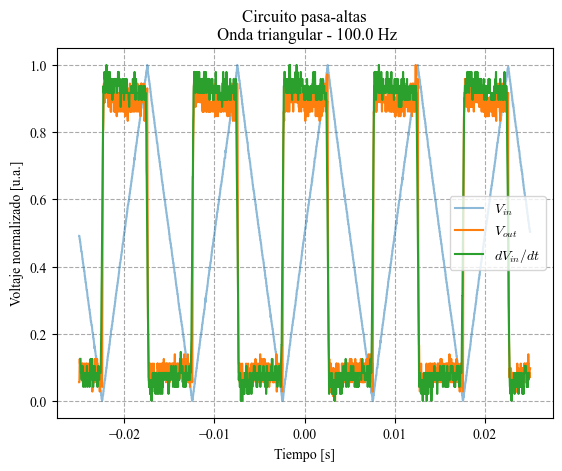

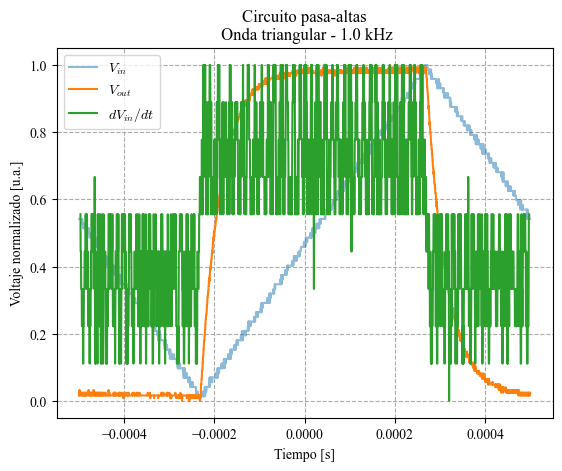

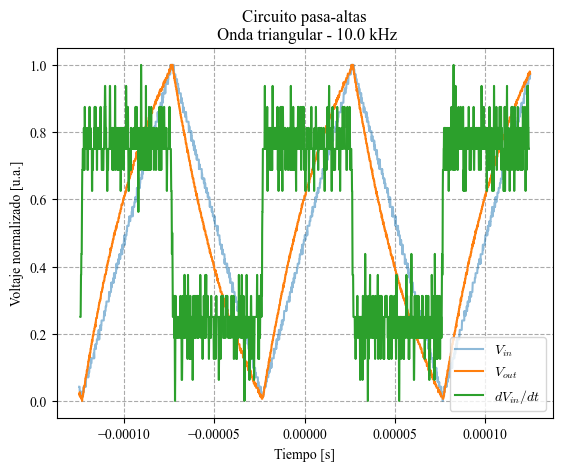

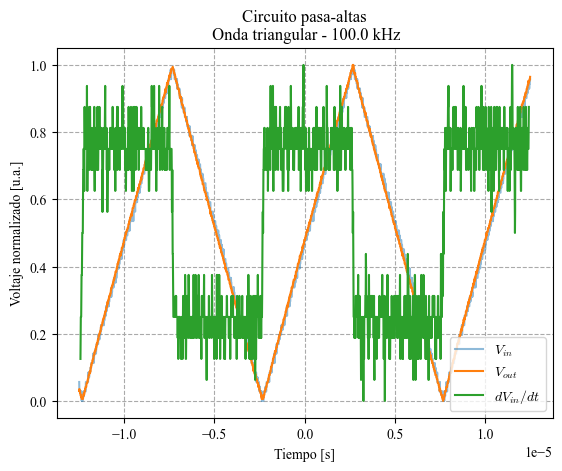

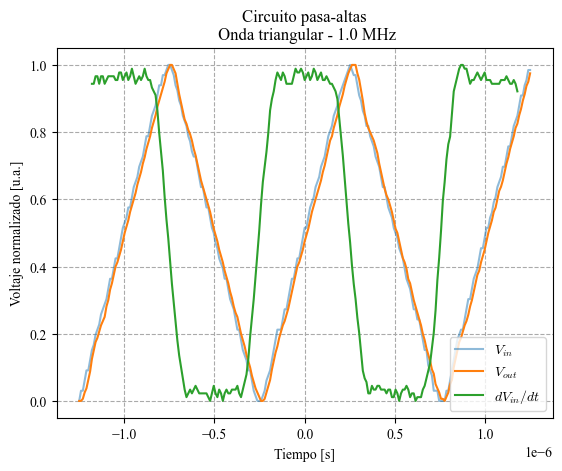

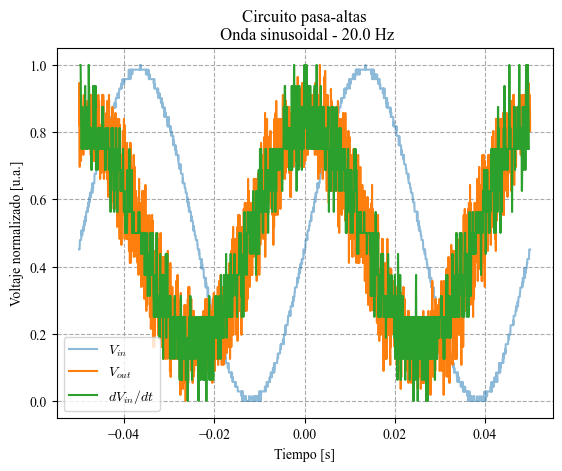

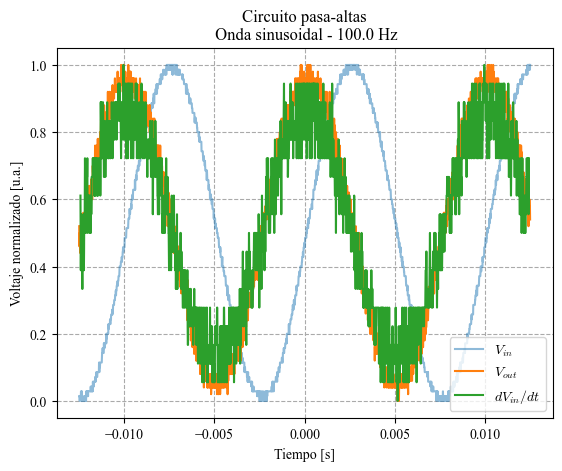

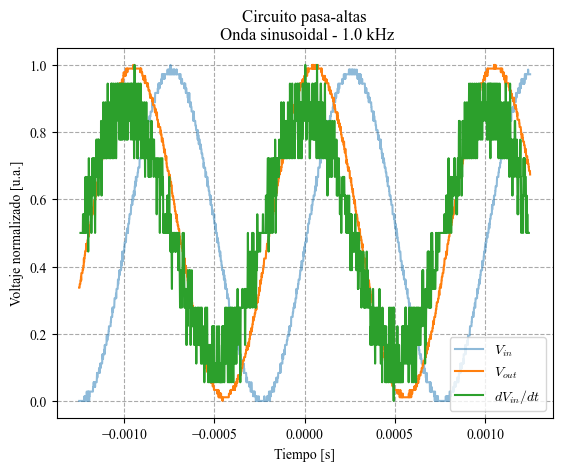

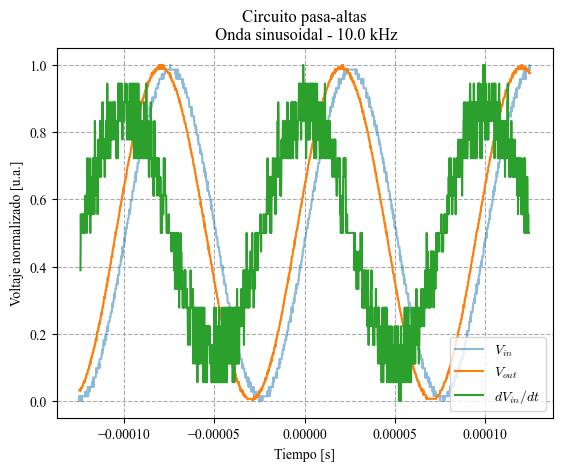

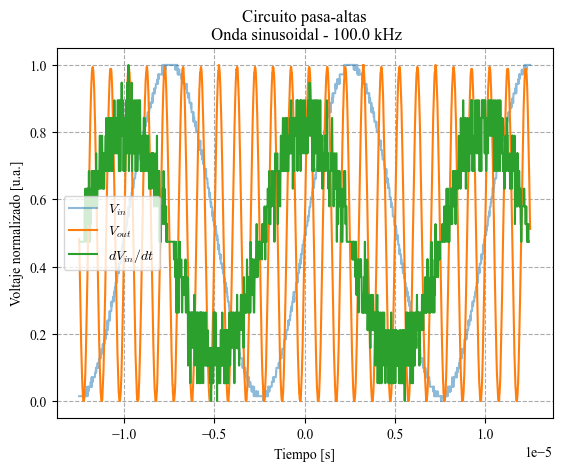

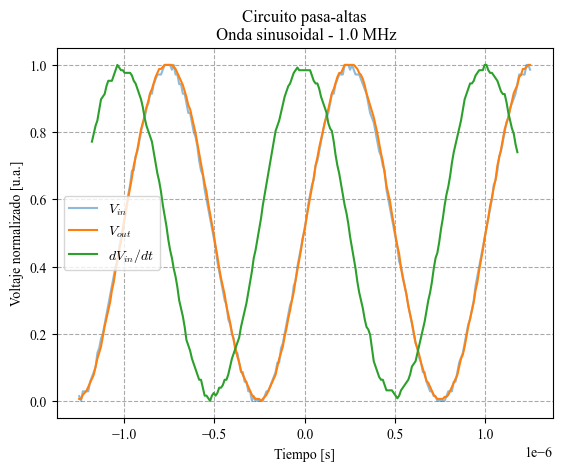

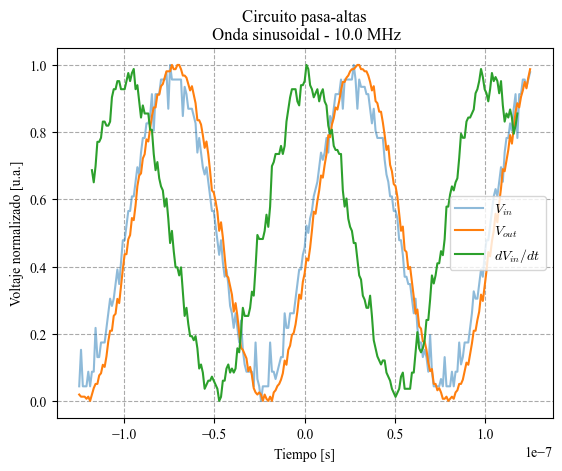

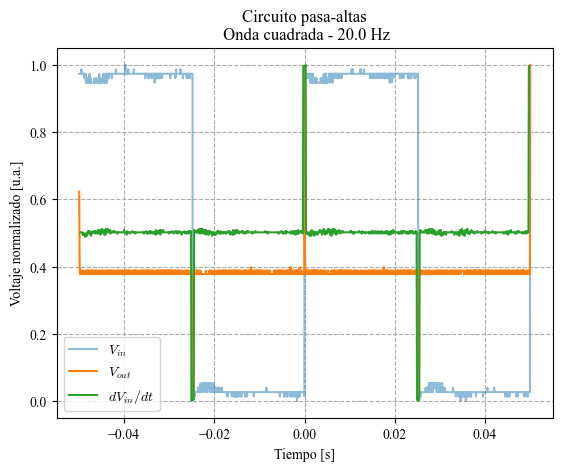

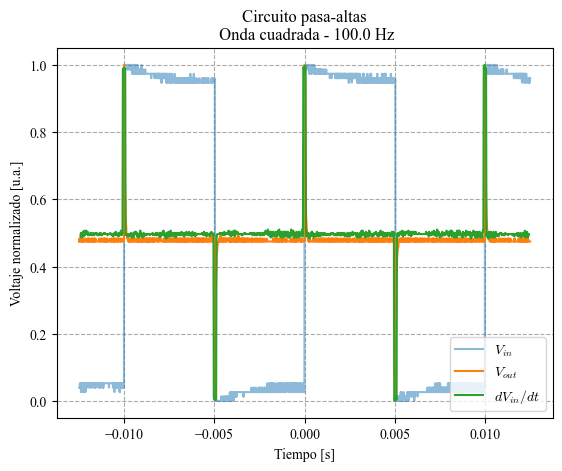

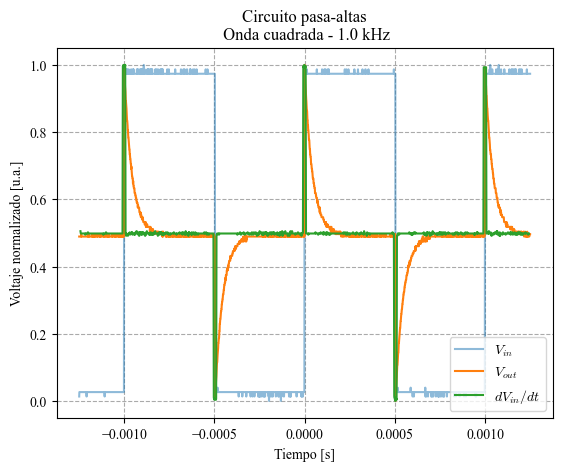

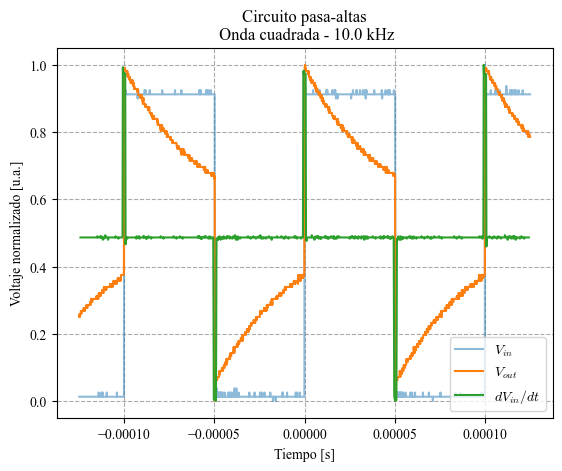

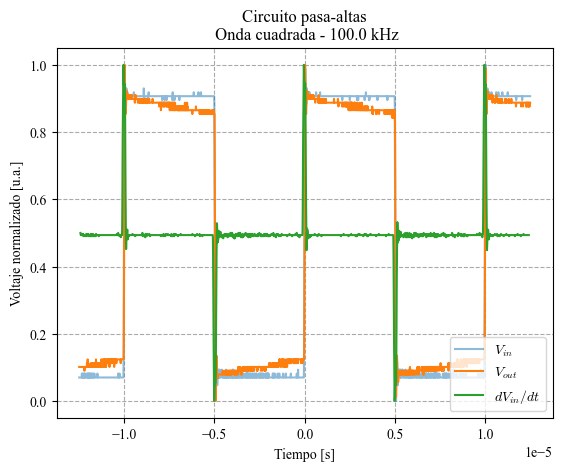

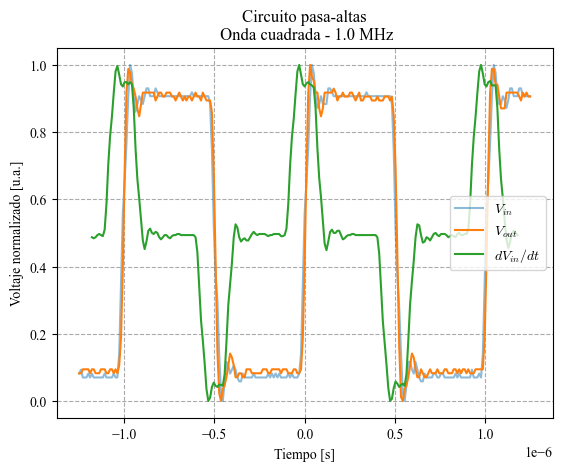

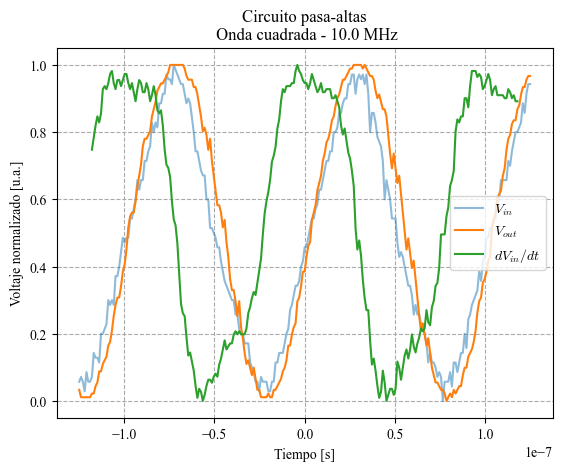

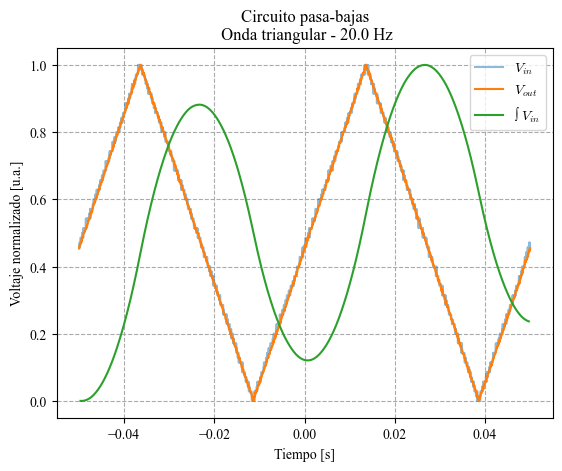

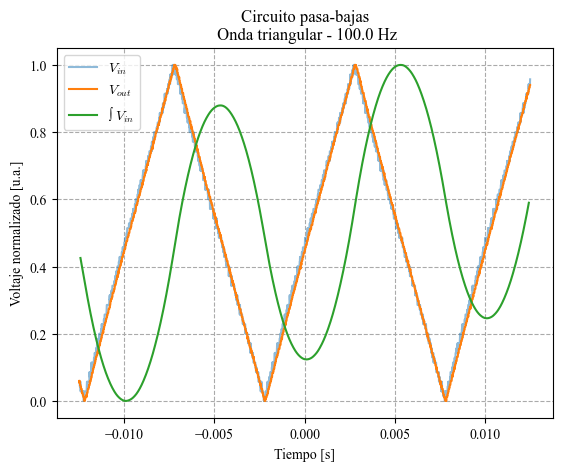

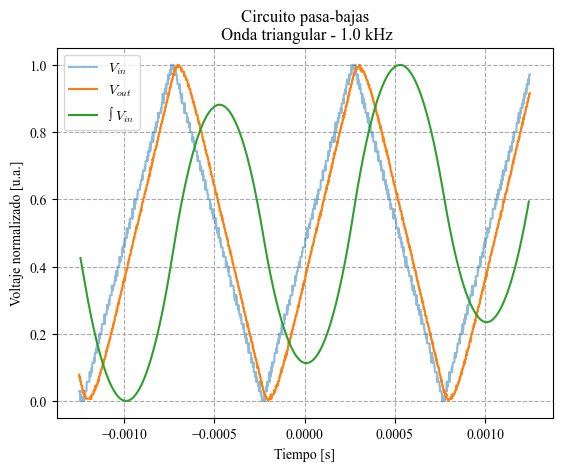

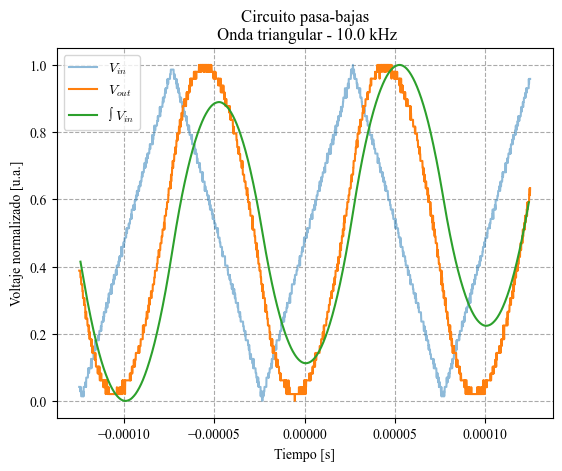

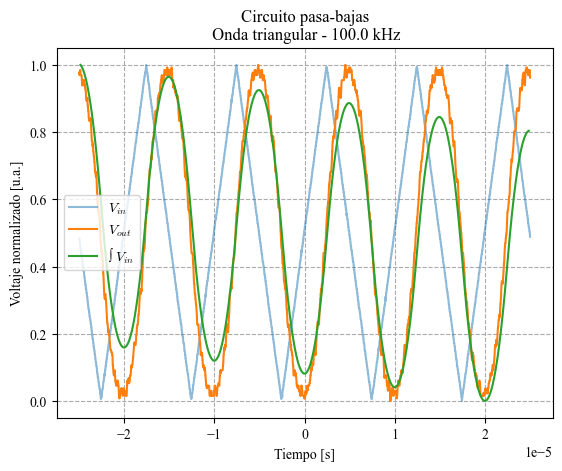

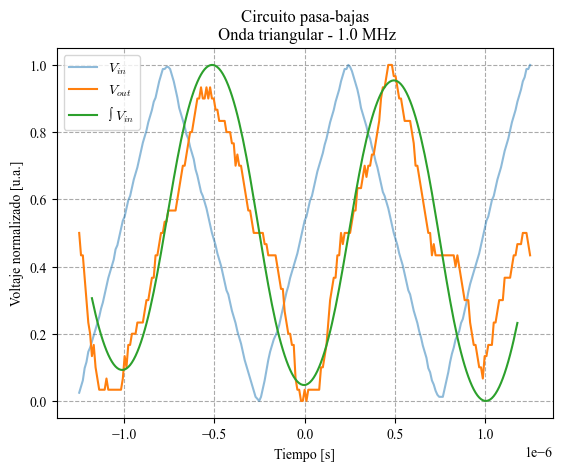

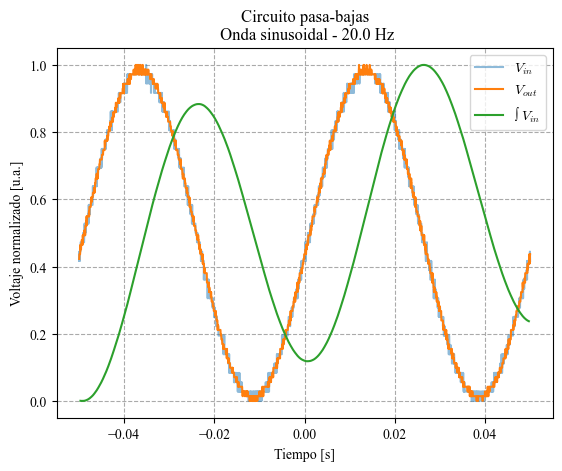

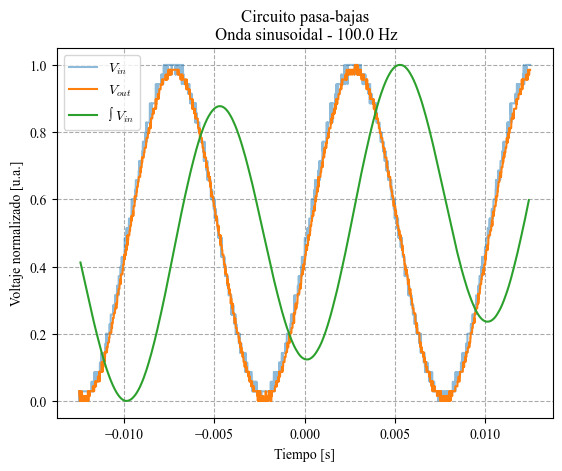

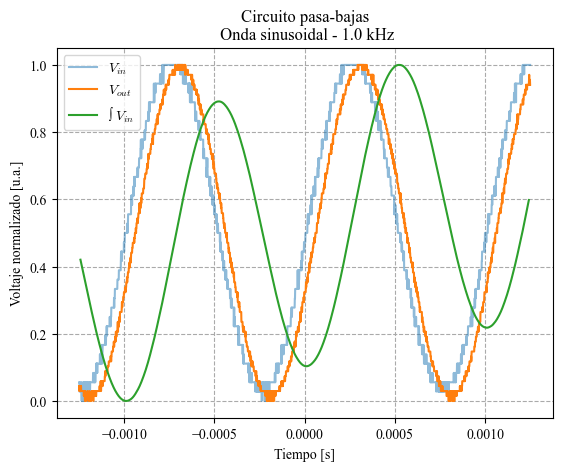

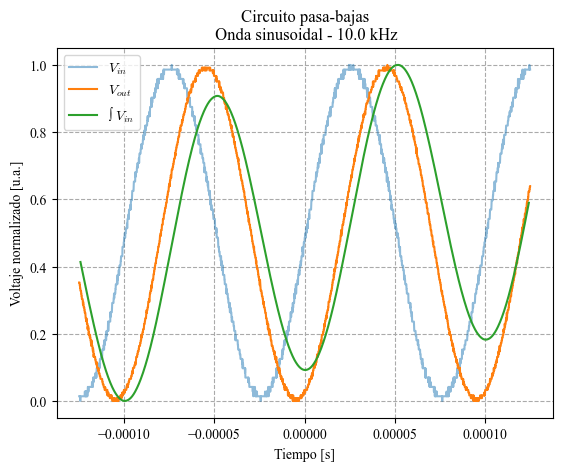

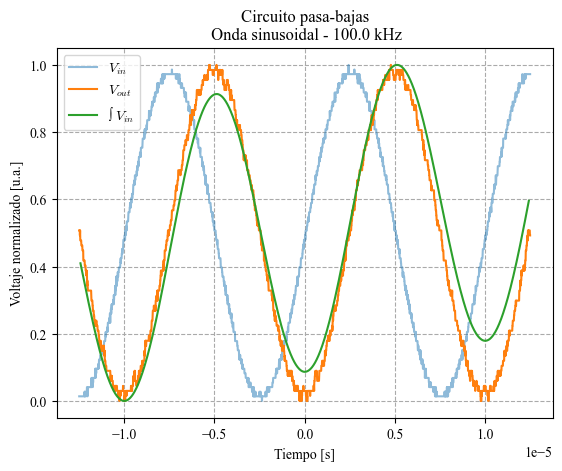

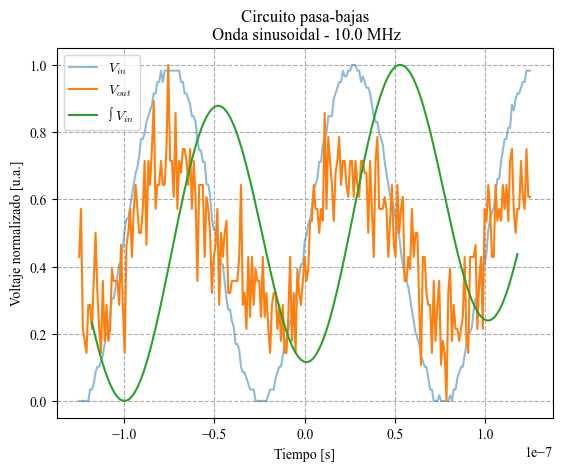

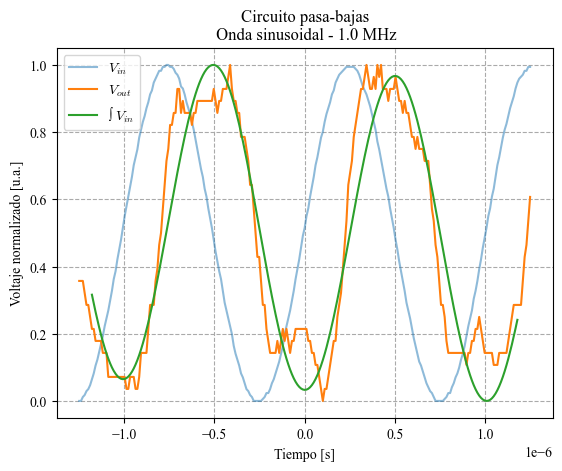

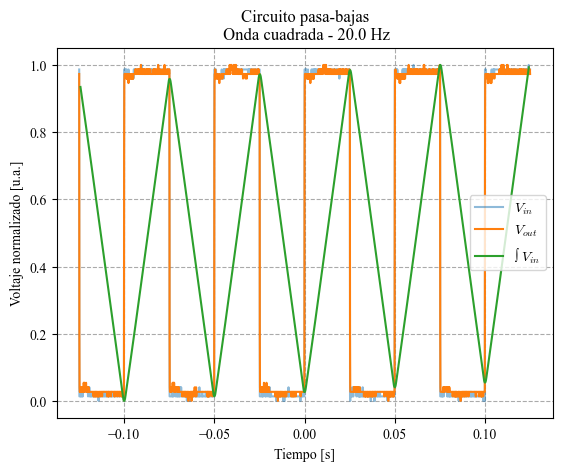

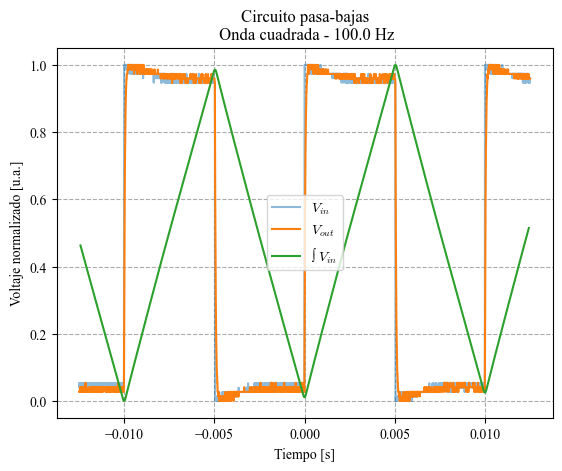

In [22]:
waveform_spanish = {"triangular": "triangular", "sine": "sinusoidal", "square": "cuadrada"}
circuit_spanish = {"low-pass": "pasa-bajas", "high-pass": "pasa-altas"}
for index, row in waveforms_df.iterrows():
    file_number = str(row["file_number"]).zfill(4)
    print(f"Progress: {100*(index+1) / len(waveforms_df):.1f}%")
    circuit_name = row["circuit"]
    waveform = row["waveform"]
    frequency = row["frequency[Hz]"]
    metadata, _, ch1_raw_data, ch2_raw_data = read_data(file_number)
    
    waveform_name = waveform_spanish[waveform]
    circuit_name_spanish = circuit_spanish[circuit_name]
    frequency_str = frequency_to_str(frequency)
    frequency_str2 = frequency_str.replace(" ", "")
    figure_filename = f"A{file_number}_{circuit_name}_{waveform}_{frequency_str2}.png"
    title = f"Circuito {circuit_name_spanish}\n Onda {waveform_name} - {frequency_str}"

    if circuit_name == "high-pass":
        operate = np.gradient
        operated_label = "$dV_{in} / dt$"
    if circuit_name == "low-pass":
        operate = lambda A: integrate(A)
        operated_label = "∫ $V_{in}$"

    show_data(title, figure_filename, metadata, ch1_raw_data, ch2_raw_data, operate, operated_label)
    